In [ ]:
import warnings
warnings.simplefilter('ignore')

install and import dependencies

In [ ]:
!pip install pystan fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

read data and process dates

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Kira-Floris/forecasting/master/sales%20forecasting/datasets/dataset.csv')
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [ ]:
# unique values in product and store
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [ ]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [ ]:
df.drop(['Time Date','Product','Store','Year','Month','Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [ ]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


train model

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

forecast away

In [ ]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,725.665137,3986.921516,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,777.402471,3968.264771,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,786.739557,3992.374645,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,882.399468,4005.209567,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,720.441946,3995.226820,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.650617,2150.788158,5270.418273,4238.714580,4244.141456,-519.180540,-519.180540,-519.180540,462.591916,...,16.646724,16.646724,16.646724,-998.419181,-998.419181,-998.419181,0.0,0.0,0.0,3722.470077
1176,2021-03-23,4242.718778,2146.191814,5280.610687,4239.741171,4245.243623,-536.641523,-536.641523,-536.641523,462.591916,...,-11.260909,-11.260909,-11.260909,-987.972530,-987.972530,-987.972530,0.0,0.0,0.0,3706.077255
1177,2021-03-24,4243.786939,2200.587824,5248.016983,4240.767761,4246.345789,-522.106981,-522.106981,-522.106981,462.591916,...,-4.393592,-4.393592,-4.393592,-980.305306,-980.305306,-980.305306,0.0,0.0,0.0,3721.679958
1178,2021-03-25,4244.855100,2197.588995,5239.369738,4241.794735,4247.447956,-490.940696,-490.940696,-490.940696,462.591916,...,22.468361,22.468361,22.468361,-976.000974,-976.000974,-976.000974,0.0,0.0,0.0,3753.914404
1179,2021-03-26,4245.923261,2143.982230,5229.269299,4242.821880,4248.550381,-547.561096,-547.561096,-547.561096,462.591916,...,-34.595035,-34.595035,-34.595035,-975.557978,-975.557978,-975.557978,0.0,0.0,0.0,3698.362164


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2393.260972
1,2018-01-02,2384.090113
2,2018-01-03,2410.877248
3,2018-01-04,2458.763613
4,2018-01-05,2423.698137
...,...,...
1175,2021-03-22,3722.470077
1176,2021-03-23,3706.077255
1177,2021-03-24,3721.679958
1178,2021-03-25,3753.914404


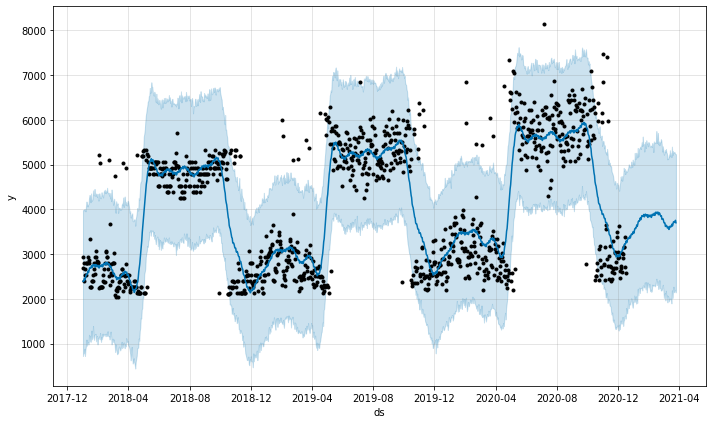

In [ ]:
plot1 = m.plot(forecast)

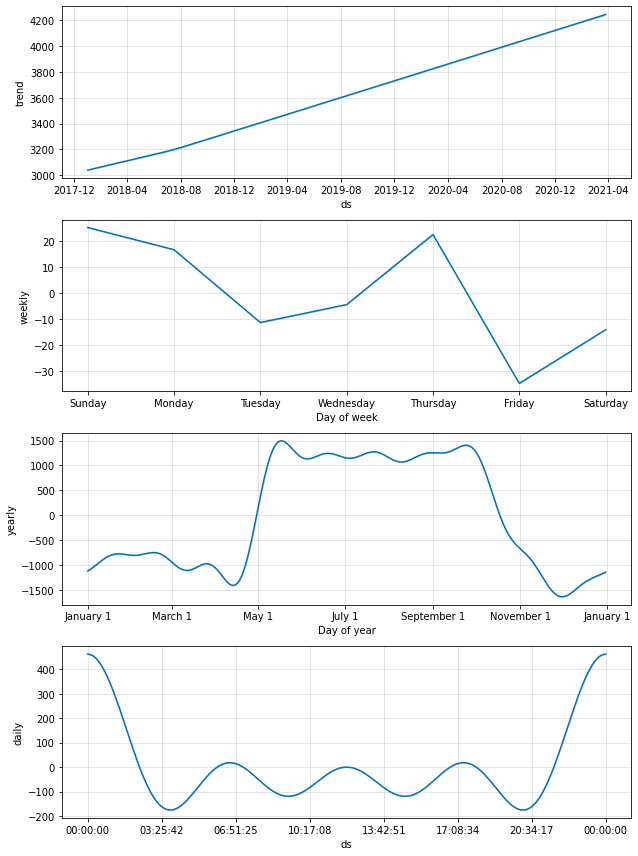

In [ ]:
plot2 = m.plot_components(forecast)